## MM


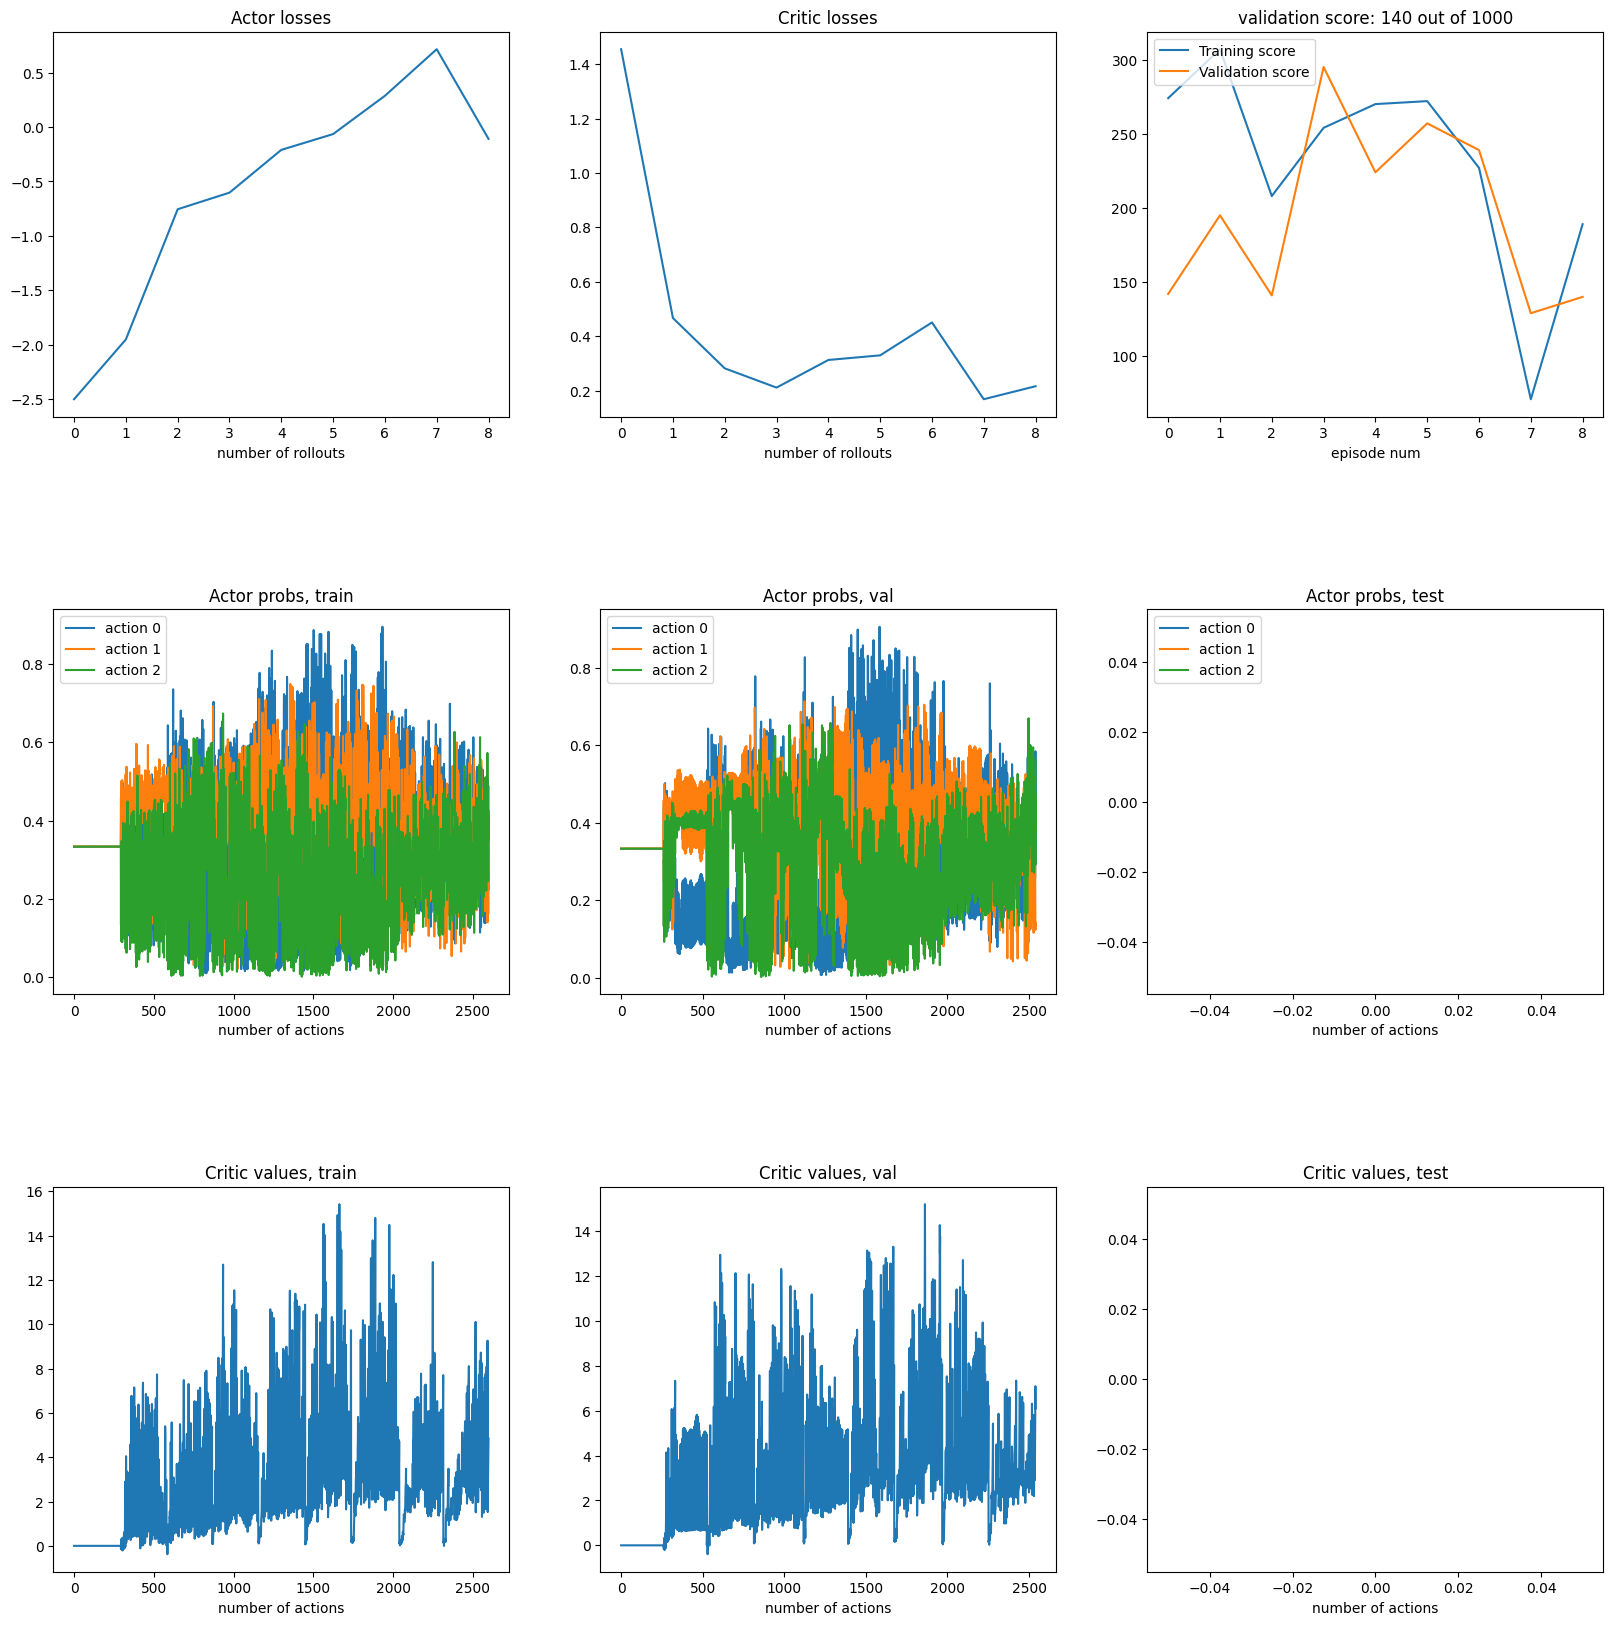

KeyboardInterrupt: 

In [1]:
from agent import PPOMMAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_episodes": 40,
        "num_rollouts": random.choice([40, 80, 160]),
        "epoch_per_rollout": random.choice([16, 32]),
        "batch_size": random.choice([16, 32, 64]),
        "gamma": random.uniform(0.7, 0.999),
        "tau": random.uniform(0.7, 0.999),
        "epsilon": 0.2,
        "entropy_weight": random.uniform(0.03, 0.1),
        "capacity": {
            "episodic": 16,
            "episodic_agent": 0,
            "semantic": 16,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "qa_policy": "episodic_semantic",
        "explore_policy": "avoid_walls",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 49,
            "randomize_observations": "objects",
            "room_size": "l",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "split_reward_training": False,
        "default_root_dir": "./training_results/PPO/mm/LSTM/l/49",
        "run_handcrafted_baselines": False,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = PPOMMAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue

## Explore


In [ ]:
from agent import PPOExploreAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_episodes": 10,
        "num_rollouts": random.choice([5, 10, 20, 40, 100]),
        "epoch_per_rollout": random.choice([16, 32, 64]),
        "batch_size": random.choice([8, 16, 32]),
        "gamma": random.uniform(0.5, 0.999),
        "tau": random.uniform(0.5, 0.999),
        "epsilon": 0.2,
        "entropy_weight": random.uniform(0.001, 0.1),
        "capacity": {
            "episodic": 4,
            "episodic_agent": 0,
            "semantic": 4,
            "semantic_map": 0,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "make_categorical_embeddings": False,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "mm_policy": "neural",
        "mm_agent_path": "./training_results/PPO/mm/LSTM/s/2024-03-09 12:04:06.565272/agent.pkl",
        "qa_policy": "episodic_semantic",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 49,
            "randomize_observations": "objects",
            "room_size": "s",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "default_root_dir": "./training_results/PPO/explore/LSTM/s",
        "run_handcrafted_baselines": None,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = PPOExploreAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue

## LSTM baseline

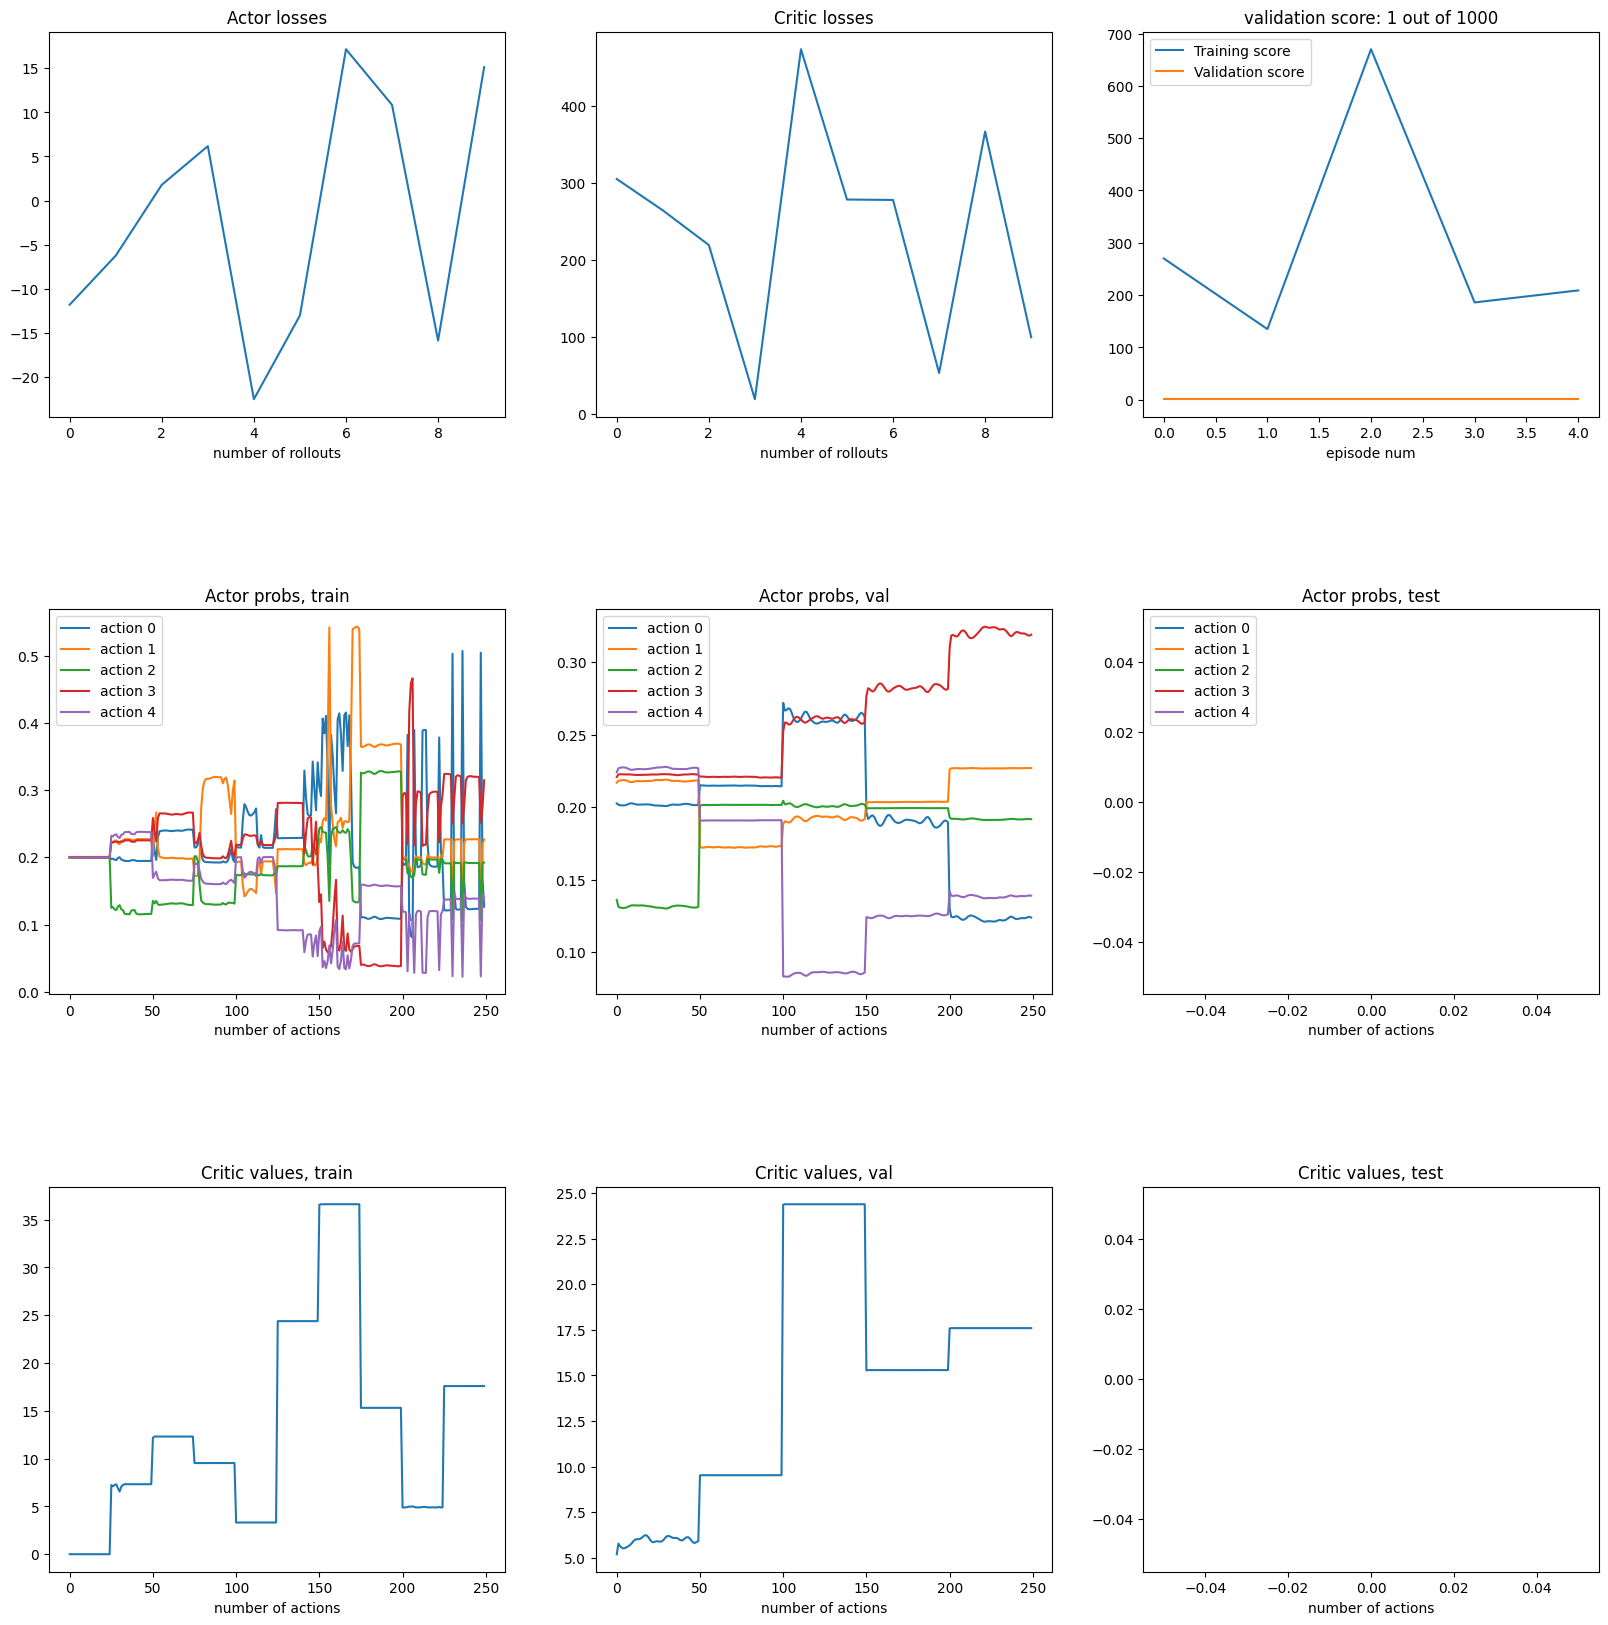

KeyboardInterrupt: 

In [1]:
from agent import PPOLSTMBaselineAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for _ in range(1000):
    params = {
        "env_str": "room_env:RoomEnv-v2",
        "num_episodes": 10,
        "num_rollouts": random.choice([5, 10, 20]),
        "epoch_per_rollout": random.choice([16, 32, 64]),
        "batch_size": random.choice([8, 16, 32]),
        "gamma": random.uniform(0.5, 0.999),
        "tau": random.uniform(0.5, 0.999),
        "epsilon": 0.2,
        "entropy_weight": random.uniform(0.001, 0.1),
        "history_block_size": 6,
        "nn_params": {
            "architecture": "lstm",
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 100,
            "max_strength": 100,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "env_config": {
            "question_prob": 1.0,
            "terminates_at": 49,
            "randomize_observations": "objects",
            "room_size": "s",
            "rewards": {"correct": 1, "wrong": 0, "partial": 0},
            "make_everything_static": False,
            "num_total_questions": 1000,
            "question_interval": 1,
            "include_walls_in_observations": True,
        },
        "default_root_dir": "./training_results/PPO/baselines/s",
        "run_handcrafted_baselines": None,
    }
    params_all.append(params)

for params in tqdm(params_all):
    try:
        agent = PPOLSTMBaselineAgent(**params)
        agent.train()
    except Exception as e:
        print(e)
        continue